In [1]:
import os
import pandas as pd
import numpy as np

df_train = pd.read_csv(r'C:\Users\Oseroke\Documents\Data Science\DSN\train.csv')
df_test = pd.read_csv(r'C:\Users\Oseroke\Documents\Data Science\DSN\test.csv')
df_train.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [2]:
df_train.shape

(38312, 19)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [4]:
df_train.isnull().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [5]:
df_train['Qualification'].value_counts(dropna=False)

First Degree or HND         25578
MSc, MBA and PhD            10469
NaN                          1679
Non-University Education      586
Name: Qualification, dtype: int64

In [6]:
#df_train['Qualification']['Foreign_schooled'].value_counts(dropna=False)
df_train.groupby(['Qualification', 'Foreign_schooled']).size()

Qualification             Foreign_schooled
First Degree or HND       No                   2244
                          Yes                 23334
MSc, MBA and PhD          No                    878
                          Yes                  9591
Non-University Education  No                     52
                          Yes                   534
dtype: int64

In [7]:
df_train.groupby(['Foreign_schooled','Qualification']).size()

Foreign_schooled  Qualification           
No                First Degree or HND          2244
                  MSc, MBA and PhD              878
                  Non-University Education       52
Yes               First Degree or HND         23334
                  MSc, MBA and PhD             9591
                  Non-University Education      534
dtype: int64

In [8]:
#trying to check if I can fill the Nans for Qualification.
df_train.loc[(df_train.Qualification != 'MSc, MBA and PhD') & (df_train.Qualification != 'First Degree or HND') & (df_train.Qualification != 'Non-University Education')].groupby('Foreign_schooled').size()

Foreign_schooled
No      143
Yes    1536
dtype: int64

In [9]:
df_train.loc[(df_train.Qualification != 'MSc, MBA and PhD') & (df_train.Qualification != 'First Degree or HND') & (df_train.Qualification != 'Non-University Education'),'Qualification'] = 'First Degree or HND'

In [10]:
df_test.loc[(df_test.Qualification != 'MSc, MBA and PhD') & (df_test.Qualification != 'First Degree or HND') & (df_test.Qualification != 'Non-University Education'),'Qualification'] = 'First Degree or HND'

In [11]:
df_test.loc[df_test.No_of_previous_employers == 'More than 5', 'No_of_previous_employers'] = 6

In [12]:
df_train['Foreign_schooled'].value_counts()

Yes    34995
No      3317
Name: Foreign_schooled, dtype: int64

In [14]:
df_train.loc[df_train.No_of_previous_employers == 'More than 5', 'No_of_previous_employers'] = 6
df_test.loc[df_test.No_of_previous_employers == 'More than 5', 'No_of_previous_employers'] = 6
df_train['Prev_employers'] = pd.to_numeric(df_train['No_of_previous_employers'])
df_test['Prev_employers'] = pd.to_numeric(df_test['No_of_previous_employers'])
df_train.drop('No_of_previous_employers', axis=1, inplace=True)
df_test.drop('No_of_previous_employers', axis=1, inplace=True)

In [15]:
df_train_Categorical_Columns = ['Division', 'Qualification', 
                                     'Channel_of_Recruitment',
                                      'Marital_Status', 'Prev_employers'
                                     ]
df_test_Categorical_Columns = ['Division', 'Qualification', 
                                     'Channel_of_Recruitment', 'Marital_Status', 'Prev_employers']

In [16]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  

for column in df_train_Categorical_Columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])
    print(column)
    print(df_train[column].unique())

for column in df_test_Categorical_Columns:
    df_test[column] = label_encoder.fit_transform(df_test[column])
    #print(column)
    #print(df_test[column].unique())


Division
[1 2 4 3 8 0 5 7 6]
Qualification
[1 0 2]
Channel_of_Recruitment
[1 0 2]
Marital_Status
[0 2 1]
Prev_employers
[0 1 4 3 2 6 5]


In [17]:
def convert_binaries_to_numbers(data):
    data['Gender'].replace(['Female','Male'],[0,1],inplace=True)
    data['Foreign_schooled'].replace(['No','Yes'],[0,1],inplace=True)
    data['Past_Disciplinary_Action'].replace(['No','Yes'],[0,1],inplace=True)
    data['Previous_IntraDepartmental_Movement'].replace(['No','Yes'],[0,1],inplace=True)
    return data

In [18]:
df_train = convert_binaries_to_numbers(df_train)
df_test = convert_binaries_to_numbers(df_test)
df_train.head(3)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Promoted_or_Not,Prev_employers
0,YAK/S/00001,1,1,0,1,2,1986,12.5,2011,1,0,41,ANAMBRA,0,0,0,0,0,0
1,YAK/S/00002,2,0,1,0,2,1991,12.5,2015,0,0,52,ANAMBRA,1,0,0,0,0,0
2,YAK/S/00003,1,0,1,1,2,1987,7.5,2012,0,0,42,KATSINA,1,0,0,0,0,0


In [19]:
import datetime
this_year = datetime.datetime.now().year
df_train['Age'] = this_year - df_train['Year_of_birth']
df_train.head(3)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Promoted_or_Not,Prev_employers,Age
0,YAK/S/00001,1,1,0,1,2,1986,12.5,2011,1,0,41,ANAMBRA,0,0,0,0,0,0,33
1,YAK/S/00002,2,0,1,0,2,1991,12.5,2015,0,0,52,ANAMBRA,1,0,0,0,0,0,28
2,YAK/S/00003,1,0,1,1,2,1987,7.5,2012,0,0,42,KATSINA,1,0,0,0,0,0,32


In [20]:
df_test['Age'] = this_year - df_test['Year_of_birth']
df_train['Length_of_service'] = this_year - df_train['Year_of_recruitment']
df_test['Length_of_service'] = this_year - df_test['Year_of_recruitment']
df_train.head(3)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,...,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Promoted_or_Not,Prev_employers,Age,Length_of_service
0,YAK/S/00001,1,1,0,1,2,1986,12.5,2011,1,...,41,ANAMBRA,0,0,0,0,0,0,33,8
1,YAK/S/00002,2,0,1,0,2,1991,12.5,2015,0,...,52,ANAMBRA,1,0,0,0,0,0,28,4
2,YAK/S/00003,1,0,1,1,2,1987,7.5,2012,0,...,42,KATSINA,1,0,0,0,0,0,32,7


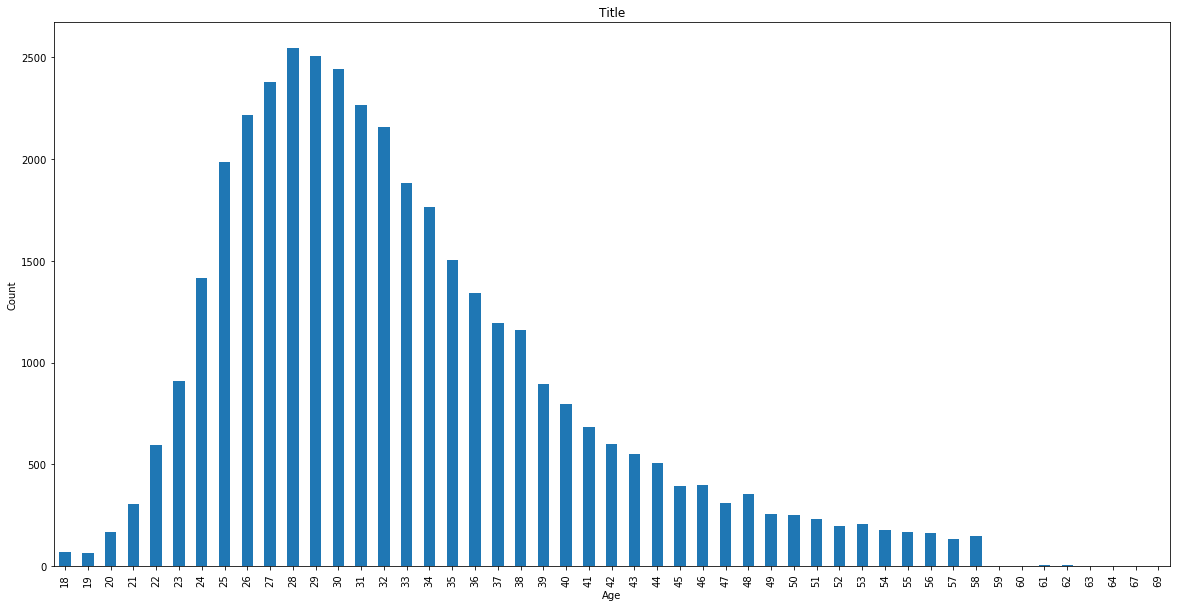

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt

age = df_train.groupby('Age').Age.count() 
age.plot.bar(figsize=(20,10))
plt.xlabel('Age')  #X-axis label
plt.ylabel('Count') #Y-axis label 
plt.title("Title") #Chart title. 


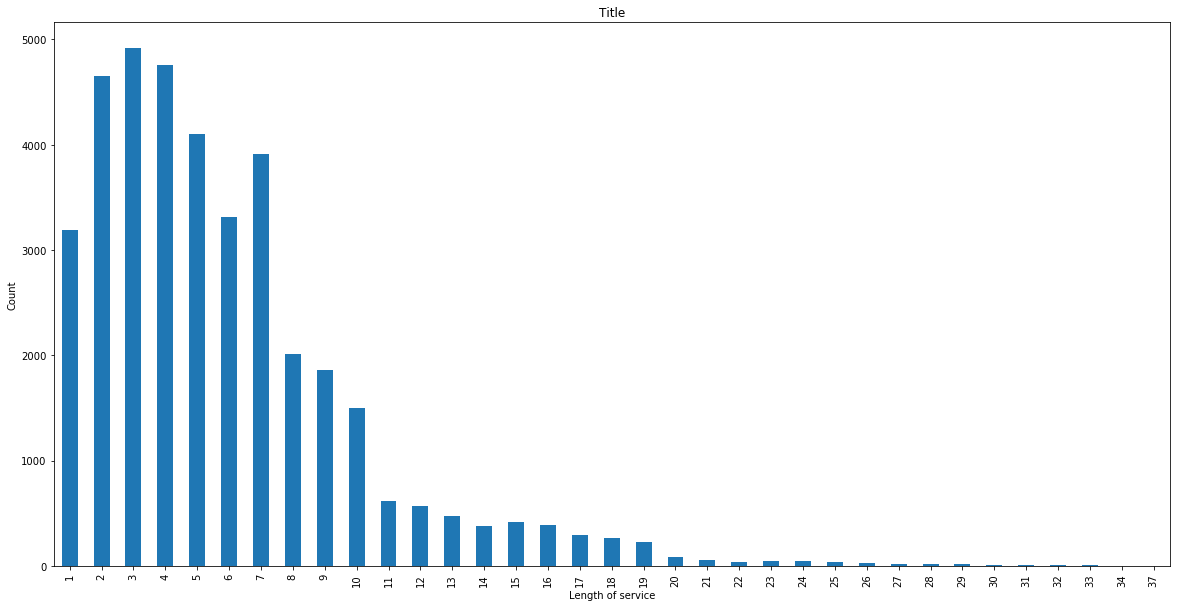

In [23]:
los = df_train.groupby('Length_of_service').Length_of_service.count() 
los.plot.bar(figsize=(20,10))
plt.xlabel('Length of service')  #X-axis label
plt.ylabel('Count') #Y-axis label 
plt.title("Title") #Chart title. 

In [24]:
def los_bins(df):
    if df['Length_of_service'] <= 5:
        return 6
    elif df['Length_of_service'] > 5 & df['Length_of_service'] <=10:
        return 5
    elif df['Length_of_service'] > 10 & df['Length_of_service'] <=15:
        return 4
    elif df['Length_of_service'] > 15 & df['Length_of_service'] <=20:
        return 3
    elif df['Length_of_service'] > 20 & df['Length_of_service'] <=25:
        return 2
    elif df['Length_of_service'] > 25 & df['Length_of_service'] <=30:
        return 1
    elif df['Length_of_service'] > 30:
        return 0

In [25]:
df_train['los_bins'] = df_train.apply(los_bins, axis=1)
df_test['los_bins'] = df_test.apply(los_bins, axis=1)
df_train.head(3)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,...,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Promoted_or_Not,Prev_employers,Age,Length_of_service,los_bins
0,YAK/S/00001,1,1,0,1,2,1986,12.5,2011,1,...,ANAMBRA,0,0,0,0,0,0,33,8,5
1,YAK/S/00002,2,0,1,0,2,1991,12.5,2015,0,...,ANAMBRA,1,0,0,0,0,0,28,4,6
2,YAK/S/00003,1,0,1,1,2,1987,7.5,2012,0,...,KATSINA,1,0,0,0,0,0,32,7,5


In [26]:
def process_categorical_features(df, categorical_columns):
    for col in categorical_columns:    
        data = df[col]
        df_check = pd.get_dummies(data, prefix=col, drop_first=False)
        df.drop(col, axis=1, inplace=True)
        df = pd.concat([df, df_check], axis=1)
    return df

In [27]:
df_train = process_categorical_features(df_train, df_train_Categorical_Columns)
df_train.head(3)

,EmployeeNo,Gender,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,...,Marital_Status_0,Marital_Status_1,Marital_Status_2,Prev_employers_0,Prev_employers_1,Prev_employers_2,Prev_employers_3,Prev_employers_4,Prev_employers_5,Prev_employers_6
0,YAK/S/00001,0,2,1986,12.5,2011,1,0,41,ANAMBRA,...,1,0,0,1,0,0,0,0,0,0
1,YAK/S/00002,1,2,1991,12.5,2015,0,0,52,ANAMBRA,...,1,0,0,1,0,0,0,0,0,0
2,YAK/S/00003,1,2,1987,7.5,2012,0,0,42,KATSINA,...,1,0,0,1,0,0,0,0,0,0


In [28]:
df_test = process_categorical_features(df_test, df_test_Categorical_Columns)

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 42 columns):
EmployeeNo                             38312 non-null object
Gender                                 38312 non-null int64
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null int64
Past_Disciplinary_Action               38312 non-null int64
Previous_IntraDepartmental_Movement    38312 non-null int64
Promoted_or_Not                        38312 non-null int64
Age                                    38312 no

In [30]:
data = df_test['EmployeeNo']

In [31]:
#drop object columns
obj_cols = ['EmployeeNo','State_Of_Origin']
def drop_obj_cols(df, obj_cols):
    for col in obj_cols:
        df.drop(col, axis=1, inplace=True)
    return df

In [32]:
df_train = drop_obj_cols(df_train, obj_cols)
df_test = drop_obj_cols(df_test, obj_cols)

### Train the model

In [33]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier

In [66]:
def train_model(df_train, test_size=0.25):
    y = df_train['Promoted_or_Not']
    X = df_train[[col for col in df_train.columns if col!="Promoted_or_Not"]]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=42)
    print("Size of train dataset: {} rows".format(X_train.shape[0]))
    print("Size of test dataset: {} rows".format(X_test.shape[0]))
    classifier = xgb.sklearn.XGBClassifier(nthread=-1, seed=42)
    classifier.fit(X_train, y_train)
   # XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
    #   gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
     #  min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
      # objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       #scale_pos_weight=1, seed=42, silent=True, subsample=1)
    XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=6, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=True, subsample=0.8, eta=0.01)
    predictions = classifier.predict(X_test)
    print("Model Accuray: {:.2f}%".format(100*classifier.score(X_test, y_test)))
    return classifier
    

In [35]:
def predict(classifier, df_test):
    predictions_test = classifier.predict(df_test)
    return predictions_test

In [36]:
def generate_predictions(predictions, data):
    predictions = pd.DataFrame(predictions)
    submissions = pd.concat([data,predictions], axis=1)
    submissions.rename(columns={0:'Promoted_or_Not'}, inplace=True)
    return submissions

In [37]:
y = df_train['Promoted_or_Not']
X = df_train[[col for col in df_train.columns if col!="Promoted_or_Not"]]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state=42)
print("Size of train dataset: {} rows".format(X_train.shape[0]))
print("Size of test dataset: {} rows".format(X_test.shape[0]))

Size of train dataset: 28734 rows
Size of test dataset: 9578 rows


In [39]:
import xgboost as xgb
from xgboost import XGBClassifier

In [40]:
classifier = xgb.sklearn.XGBClassifier(nthread=-1, seed=42)

In [65]:
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=True, subsample=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=42, silent=True, subsample=1, verbosity=1)

### Evaluation

In [42]:
predictions = classifier.predict(X_test)

In [43]:
print("Model Accuray: {:.2f}%".format(100*classifier.score(X_test, y_test)))

Model Accuray: 93.59%


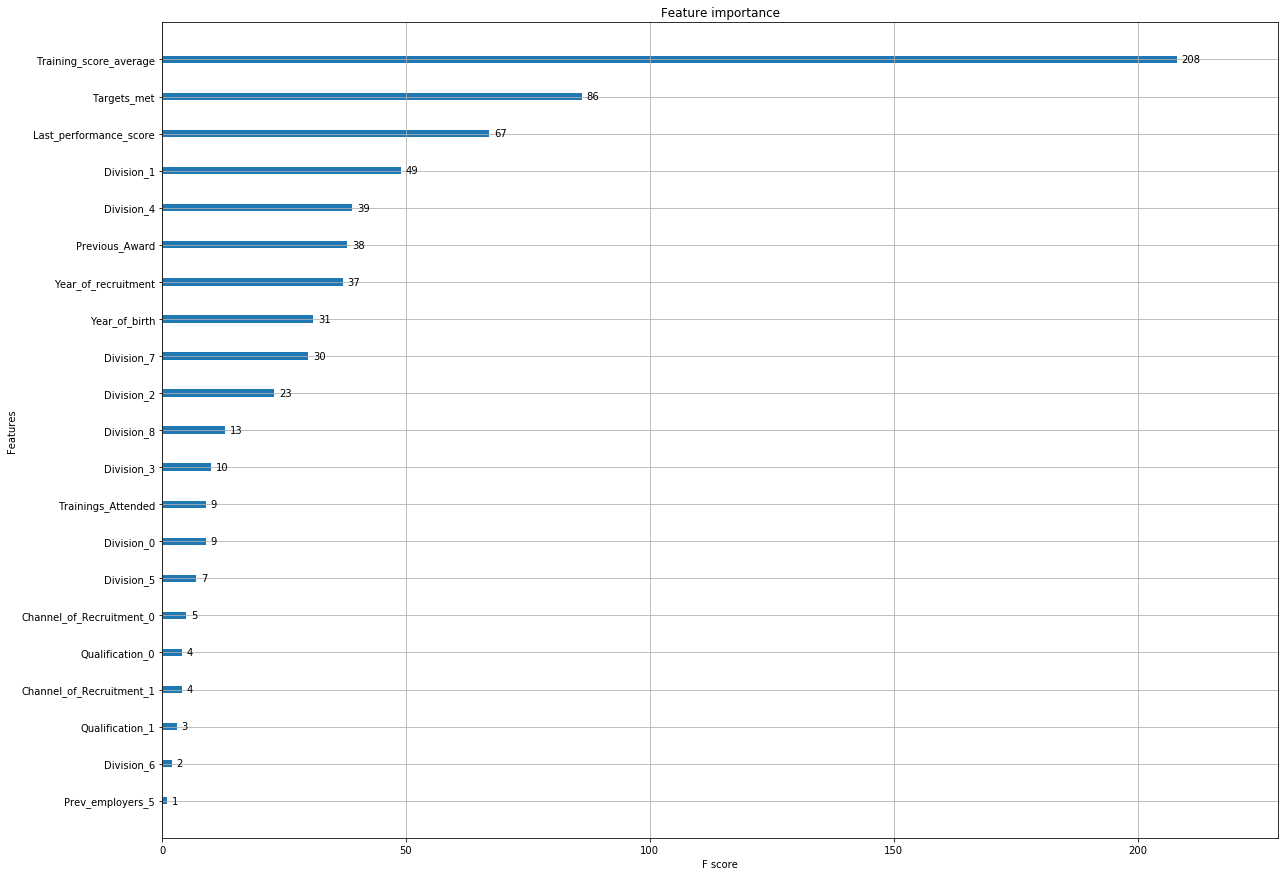

In [44]:
plt.figure(figsize=(20,15))
xgb.plot_importance(classifier, ax=plt.gca())

In [45]:
predictions = classifier.predict(df_test)

In [46]:
predictions = pd.DataFrame(predictions)
predictions.head(3)

,0
0,0
1,0
2,0


In [47]:
predictions.shape

(16496, 1)

In [48]:
submissions = pd.concat([data,predictions], axis=1)
submissions.head(3)

,EmployeeNo,0
0,YAK/S/00005,0
1,YAK/S/00011,0
2,YAK/S/00015,0


In [49]:
submissions.rename(columns={0:'Promoted_or_Not'}, inplace=True)


In [50]:
submissions.head()

,EmployeeNo,Promoted_or_Not
0,YAK/S/00005,0
1,YAK/S/00011,0
2,YAK/S/00015,0
3,YAK/S/00016,0
4,YAK/S/00017,0


In [51]:
submissions.to_csv(r'C:\Users\Oseroke\Documents\Data Science\DSN\submission10.csv', index=False)
#0.9377 on kaggle for submission1, 0.93916 for submission6

In [ ]:
submissions.shape

In [ ]:
df_test.shape[0]

#### tried to increase the training size

In [80]:
classifier = train_model(df_train, 0.3)

Size of train dataset: 26818 rows
Size of test dataset: 11494 rows
Model Accuray: 93.62%


In [81]:
prediction = predict(classifier, df_test)

In [82]:
submission = generate_predictions(prediction, data)

In [83]:
submission.to_csv(r'C:\Users\Oseroke\Documents\Data Science\DSN\submission16.csv', index=False)

#### tried to drop certain fields

In [ ]:
df_train.info()

In [ ]:
df_train = df_train.drop(['Year_of_birth','Year_of_recruitment'],axis=1)
df_test = df_test.drop(['Year_of_birth','Year_of_recruitment'],axis=1)

In [ ]:
df_train.shape

In [ ]:
classifier = train_model(df_train, 0.25)
prediction = predict(classifier, df_test)
submission = generate_predictions(prediction, data)
submission.to_csv(r'C:\Users\Oseroke\Documents\Data Science\DSN\submission8.csv', index=False)

#### I want to remove state of origin from the entire equation to test

In [ ]:
df_train_store = df_train.copy()
df_test_store = df_test.copy()
cols = [c for c in df_train.columns if c.lower()[:5] != 'state']
df_train = df_train[cols]
cols = [c for c in df_test.columns if c.lower()[:5] != 'state']
df_test = df_test[cols]


In [ ]:
classifier = train_model(df_train, 0.25)
prediction = predict(classifier, df_test)
submission = generate_predictions(prediction, data)
submission.to_csv(r'C:\Users\Oseroke\Documents\Data Science\DSN\submission4.csv', index=False)

In [ ]:
df_train.shape

In [ ]:
df_train.info()

In [ ]:
df_train = df_train.drop(['Year_of_birth','Year_of_recruitment','log_age','log_los'],axis=1)
df_test = df_test.drop(['Year_of_birth','Year_of_recruitment','log_age','log_los'],axis=1)
df_train.shape

In [ ]:
classifier = train_model(df_train, 0.15)
prediction = predict(classifier, df_test)
submission = generate_predictions(prediction, data)
submission.to_csv(r'C:\Users\Oseroke\Documents\Data Science\DSN\submission5.csv', index=False)

In [ ]:
df_test.shape

In [ ]:
plt.figure(figsize=(20,15))
xgb.plot_importance(classifier, ax=plt.gca())

In [ ]:
def gender(df):
    if df['Gender_0'] == 1:
        return 0
    else:
        return 1

def foreign_schooled(df):
    if df['Foreign_schooled_0'] == 1:
        return 0
    else:
        return 1

In [ ]:
df_train['Gender'] = df_train.apply(gender, axis=1)
df_test['Gender'] = df_test.apply(gender, axis=1)
df_train['Foreign_schooled'] = df_train.apply(foreign_schooled, axis=1)
df_test['Foreign_schooled'] = df_test.apply(foreign_schooled, axis=1)

df_train.head(3)

### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
def train_model_rfc(df_train, test_size=0.25):
    y = df_train['Promoted_or_Not']
    X = df_train[[col for col in df_train.columns if col!="Promoted_or_Not"]]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=42)
    print("Size of train dataset: {} rows".format(X_train.shape[0]))
    print("Size of test dataset: {} rows".format(X_test.shape[0]))
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    return rfc

In [55]:
classifier = train_model_rfc(df_train, 0.25)
prediction = predict(classifier, df_test)
submission = generate_predictions(prediction, data)
submission.to_csv(r'C:\Users\Oseroke\Documents\Data Science\DSN\submission11.csv', index=False)

Size of train dataset: 28734 rows
Size of test dataset: 9578 rows


In [ ]:
classifier

In [ ]:
df_train.info()

### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [61]:
def train_model_logreg(df_train, test_size=0.25):
    y = df_train['Promoted_or_Not']
    X = df_train[[col for col in df_train.columns if col!="Promoted_or_Not"]]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=42)
    print("Size of train dataset: {} rows".format(X_train.shape[0]))
    print("Size of test dataset: {} rows".format(X_test.shape[0]))
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    return log_reg

In [62]:
classifier = train_model_logreg(df_train, 0.25)
prediction = predict(classifier, df_test)
submission = generate_predictions(prediction, data)
submission.to_csv(r'C:\Users\Oseroke\Documents\Data Science\DSN\submission12.csv', index=False)

Size of train dataset: 28734 rows
Size of test dataset: 9578 rows
